# 1. Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load measurements data

In [2]:
measurements = pd.read_excel("Metrics.xlsx").round(2)
measurements

,Puzzle,Area,Missing ele,% miss elements,Miss parameter,Strategy,Instructions,Blocks,Methods,avg inst/method,Field load,Field store,Regular load,Regular store,new,newarray,anew array,multianewarray
0,9x9_01,81,22,0.27,81,DLX,552853702,234811035,3580,154428,319990,10520,81579233,78483275,1038,60,5,2
1,9x9_01,81,22,0.27,81,BFS,279987748,119984751,943,296911,2741,23,40021575,39989362,38,0,4,1
2,9x9_01,81,22,0.27,81,CP,242926882,104102209,766,317136,3187,23,34720826,34696712,156,0,4,1
3,9x9_01,81,16,0.20,54,DLX,540760952,229545840,3566,151643,319810,10426,79930773,76749802,1030,66,5,2
4,9x9_01,81,16,0.20,54,BFS,199699392,85578086,806,247766,1979,23,28545477,28521926,38,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,25X25_01,625,80,0.13,416,BFS,2565392079,1099319297,6832,375497,43260,23,366786265,366370389,54,0,4,1
59,25X25_01,625,80,0.13,416,CP,2462313855,1055156220,5741,428900,52135,23,351977002,351668968,1250,0,4,1
60,25X25_01,625,46,0.07,208,DLX,5237684629,1869326215,36532,143373,43124906,79252,1197934506,668213063,7598,580,5,2
61,25X25_01,625,46,0.07,208,BFS,1605919279,688172843,5289,303634,23564,23,229593634,229349622,54,0,4,1


In [3]:
measurements.describe()

,Area,Missing ele,% miss elements,Miss parameter,Instructions,Blocks,Methods,avg inst/method,Field load,Field store,Regular load,Regular store,new,newarray,anew array,multianewarray
count,63.000000,63.000000,63.000000,63.000000,6.300000e+01,6.300000e+01,63.000000,63.000000,6.300000e+01,63.000000,6.300000e+01,6.300000e+01,63.000000,63.000000,63.000000,63.000000
mean,233.714286,34.714286,0.165238,155.619048,1.185503e+09,4.847469e+08,5687.333333,256382.873016,2.810690e+06,10116.539683,1.975014e+08,1.642588e+08,1147.015873,66.666667,4.333333,1.333333
std,180.547325,25.620952,0.062187,144.910921,1.294410e+09,4.990882e+08,8042.946962,123356.369371,9.245836e+06,19656.512295,2.629058e+08,1.725898e+08,1829.266215,132.408337,0.475191,0.475191
min,81.000000,9.000000,0.070000,27.000000,8.647419e+07,3.705598e+07,602.000000,138393.000000,1.072000e+03,23.000000,1.236173e+07,1.234991e+07,38.000000,0.000000,4.000000,1.000000
25%,81.000000,16.000000,0.110000,54.000000,3.335265e+08,1.429250e+08,977.000000,148478.000000,3.396000e+03,23.000000,4.767568e+07,4.763452e+07,45.000000,0.000000,4.000000,1.000000
50%,256.000000,23.000000,0.150000,85.000000,5.528558e+08,2.348113e+08,3305.000000,212395.000000,1.838000e+04,23.000000,8.157998e+07,7.848343e+07,223.000000,0.000000,4.000000,1.000000
75%,256.000000,46.000000,0.210000,208.000000,1.766310e+09,7.282412e+08,5563.000000,336252.000000,3.199010e+05,10473.000000,3.006902e+08,2.451725e+08,1058.000000,66.000000,5.000000,2.000000
max,625.000000,114.000000,0.270000,625.000000,5.315604e+09,1.922791e+09,36784.000000,633912.000000,4.312915e+07,81414.000000,1.197935e+09,6.807657e+08,7782.000000,580.000000,5.000000,2.000000


## Notes:
The metrics: __multianewarray, anew array, miss parameter__ seem to be useless.

In [4]:
measurements = measurements.drop(['multianewarray','anew array','Miss parameter'], axis=1)

# 3. Correlation Matrix

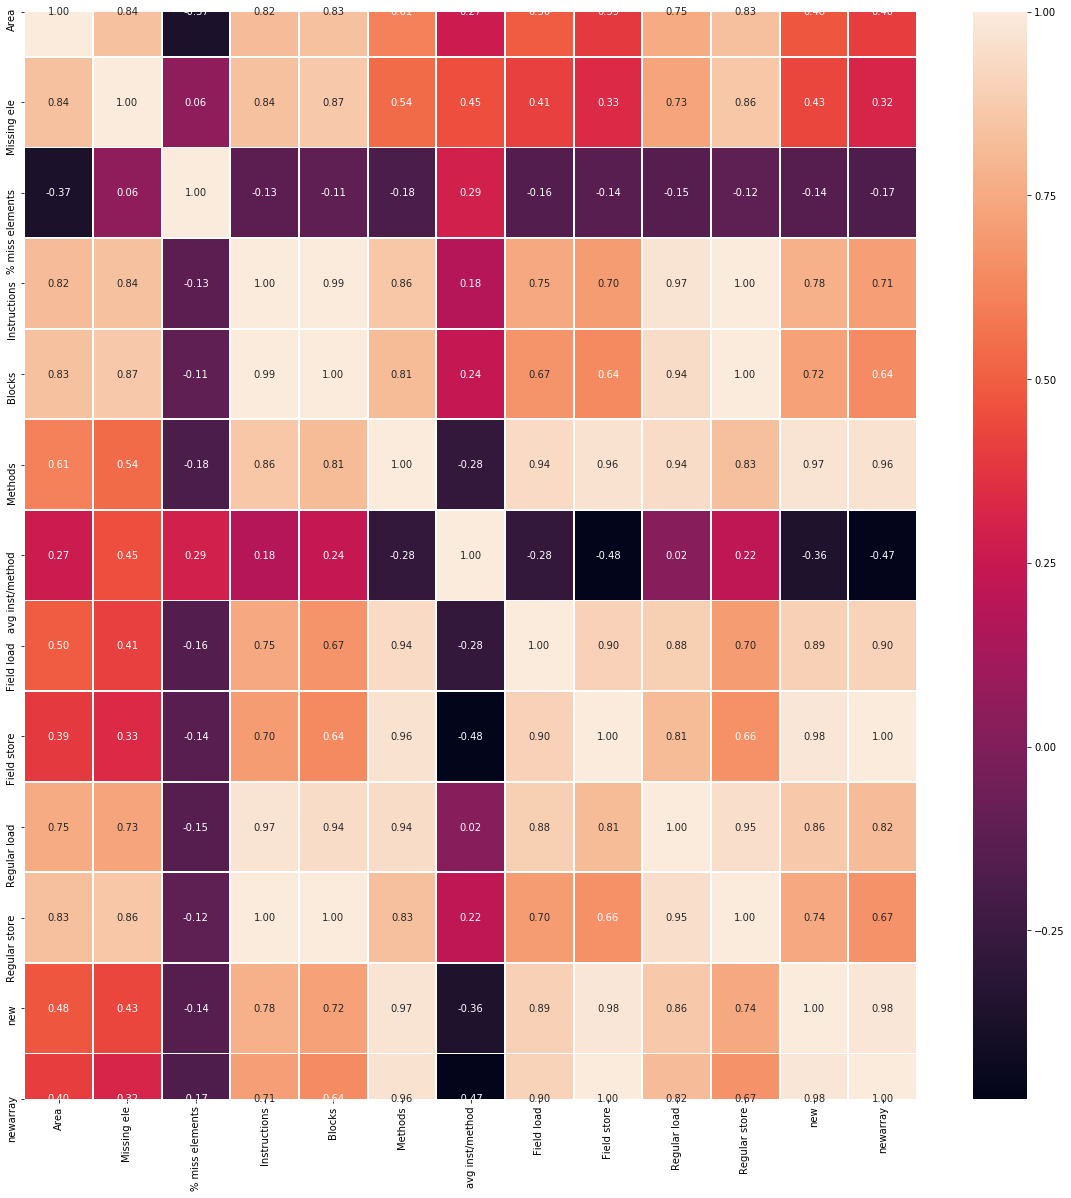

In [13]:
corr_features = measurements.copy()
corr_features.drop(['Puzzle','Strategy'], axis=1)
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_features.corr(), annot=True, linewidths=.9, fmt= '.2f',ax=ax)

## Notes

__1)__ Number of __instructions__ is __highly correlated with number of blocks (0.99)__. Thus, __we will not comment on number of blocks__. Furthemore, __instructions__ has a __correlation of 0.86 with methods__. Moreover, __methods__ has __rather less overhead than instructions or blocks__, since these 3 have a __high correlation among them__, it would be __benefic performance wise to keep only methods__. 

__2)__ __Area__ is __highly correlated__ with __regular load (0.75)__ and __regular store (0.83)__. Also, it has a __high correlation__ with __instructions (0.82)__.

---

### Hypothesis 1:
The __high correlation of Area__ with __regular load__ and __regular store__ may indicate that __as these values increase, bigger chunks of memory are being allocated__. We will verify if this is true of false in __section 4__. 

This conclusion __would be useful since our metrics do not give us the amount of memory allocated__.

---

__3) Missing elements__ are __highly correlated__ with __instructions (0.84)__. Thefore, the more incomplete the puzzles are, the more __computationally demanding is to solve it__. Also, it is also __highly correlated__ with __regular store (0.86)__. Furthermore, the correlation with __regular load__ is __(0.78)__. This will be __analyzed in further detail in section 4__.



# 4. Mean values grouped on missing elements and strategy

In [8]:
sec41 = measurements.groupby(['Area','Missing ele','Strategy'], as_index=True)['Instructions','Methods','Blocks',
                                                 'Field load','Field store', 'Regular load','Regular store',
                                                'new', 'newarray'].mean().round(0)

methods_ratio, instructions_ratio = getRatios2(sec41['Methods'], sec41['Instructions'])
sec41.insert(1,"Instructions increase", instructions_ratio)
sec41.insert(3,"Methods increase", methods_ratio)

sec41

Instructions  Instructions increase  Methods  \
Area Missing ele Strategy                                                 
81   9           BFS       1.098048e+08                    NaN    644.0   
                 CP        9.745401e+07                    NaN    626.0   
                 DLX       5.266531e+08                    NaN   3548.0   
     16          BFS       2.250880e+08                   2.05    848.0   
                 CP        1.942078e+08                   1.99    722.0   
                 DLX       5.407618e+08                   1.03   3573.0   
     22          BFS       3.136109e+08                   1.39   1000.0   
                 CP        2.889014e+08                   1.49    819.0   
                 DLX       5.528554e+08                   1.02   3593.0   
256  23          BFS       3.994247e+08                    NaN   1852.0   
                 CP        3.884431e+08                    NaN   1811.0   
                 DLX       1.766309e+09                    NaN  12755.0   
     39          BFS       7.720594e+08                   1.93   2469.0   
                 CP        1.035542e+09                   2.67   2505.0   
                 DLX       1.795406e+09                   1.02  12839.0   
     54          BFS       1.881017e+09                   2.44   4255.0   
                 CP        1.617449e+09                   1.56   3085.0   
                 DLX       1.822690e+09                   1.02  12933.0   
625  46          BFS       1.605919e+09                    NaN   5289.0   
                 CP        1.297088e+09                    NaN   4585.0   
                 DLX       5.237685e+09                    NaN  36532.0   
     80          BFS       2.565392e+09                   1.60   6832.0   
                 CP        2.462314e+09                   1.90   5741.0   
                 DLX       5.276632e+09                   1.01  36642.0   
     114         BFS       3.868759e+09                   1.51   8910.0   
                 CP        4.074284e+09                   1.65   7361.0   
                 DLX       5.315604e+09                   1.01  36784.0   

                           Methods increase        Blocks  Field load  \
Area Missing ele Strategy                                               
81   9           BFS                    NaN  4.705465e+07      1211.0   
                 CP                     NaN  4.176096e+07      1598.0   
                 DLX                    NaN  2.234033e+08    319569.0   
     16          BFS                   1.32  9.645837e+07      2086.0   
                 CP                    1.15  8.322387e+07      2715.0   
                 DLX                   1.01  2.295460e+08    319963.0   
     22          BFS                   1.18  1.343939e+08      2911.0   
                 CP                    1.13  1.238043e+08      3615.0   
                 DLX                   1.01  2.348113e+08    320297.0   
256  23          BFS                    NaN  1.711632e+08      5294.0   
                 CP                     NaN  1.664547e+08      7488.0   
                 DLX                    NaN  7.166887e+08   4909363.0   
     39          BFS                   1.33  3.308487e+08     10014.0   
                 CP                    1.38  4.437596e+08     17231.0   
                 DLX                   1.01  7.303962e+08   4910935.0   
     54          BFS                   1.72  8.060759e+08     22309.0   
                 CP                    1.23  6.931280e+08     25960.0   
                 DLX                   1.01  7.432485e+08   4912773.0   
625  46          BFS                    NaN  6.881728e+08     23564.0   
                 CP                     NaN  5.558232e+08     29039.0   
                 DLX                    NaN  1.869326e+09  43124906.0   
     80          BFS                   1.29  1.099319e+09     43260.0   
                 CP                    1.25  1.055156e+09     52135.0   
                 DLX      

In [9]:
sec42 = measurements.groupby(['% miss elements','Strategy'], as_index=True)['Area','Missing ele','Instructions','Methods','Blocks',
                                                 'Field load','Field store', 'Regular load','Regular store',
                                                'new', 'newarray'].mean().round(0)
a,b = sec42.iloc[[15,16,17]], sec42.iloc[[18,19,20]]

temp = sec42.iloc[[15,16,17]].copy()
sec42.iloc[[15,16,17]] = b.values
sec42.iloc[[18,19,20]] = temp.values

methods_ratio, instructions_ratio = getRatios1(sec42['Methods'], sec42['Instructions'])
sec42.insert(3,"Instructions increase", instructions_ratio)
sec42.insert(5,"Methods increase", methods_ratio)

sec42

Area  Missing ele  Instructions  \
% miss elements Strategy                                     
0.07            BFS       625.0         46.0  1.605919e+09   
                CP        625.0         46.0  1.297088e+09   
                DLX       625.0         46.0  5.237685e+09   
0.09            BFS       256.0         23.0  3.994247e+08   
                CP        256.0         23.0  3.884431e+08   
                DLX       256.0         23.0  1.766309e+09   
0.11            BFS        81.0          9.0  1.098048e+08   
                CP         81.0          9.0  9.745401e+07   
                DLX        81.0          9.0  5.266531e+08   
0.13            BFS       625.0         80.0  2.565392e+09   
                CP        625.0         80.0  2.462314e+09   
                DLX       625.0         80.0  5.276632e+09   
0.15            BFS       256.0         39.0  7.720594e+08   
                CP        256.0         39.0  1.035542e+09   
                DLX       256.0         39.0  1.795406e+09   
0.18            BFS        81.0         16.0  2.250880e+08   
                CP         81.0         16.0  1.942078e+08   
                DLX        81.0         16.0  5.407618e+08   
0.20            BFS       625.0        114.0  3.868759e+09   
                CP        625.0        114.0  4.074284e+09   
                DLX       625.0        114.0  5.315604e+09   
0.21            BFS       256.0         54.0  1.881017e+09   
                CP        256.0         54.0  1.617449e+09   
                DLX       256.0         54.0  1.822690e+09   
0.27            BFS        81.0         22.0  3.136109e+08   
                CP         81.0         22.0  2.889014e+08   
                DLX        81.0         22.0  5.528554e+08   

                          Instructions increase  Methods  Methods increase  \
% miss elements Strategy                                                     
0.07            BFS                        4.02   5289.0              2.86   
                CP                         3.34   4585.0              2.53   
                DLX                        2.97  36532.0              2.86   
0.09            BFS                        3.64   1852.0              2.88   
                CP                         3.99   1811.0              2.89   
                DLX                        3.35  12755.0              3.59   
0.11            BFS                         NaN    644.0               NaN   
                CP                          NaN    626.0               NaN   
                DLX                         NaN   3548.0               NaN   
0.13            BFS                        3.32   6832.0              2.77   
                CP                         2.38   5741.0              2.29   
                DLX                        2.94  36642.0              2.85   
0.15            BFS                        3.43   2469.0              2.91   
                CP                         5.33   2505.0              3.47   
                DLX                        3.32  12839.0              3.59   
0.18            BFS                         NaN    848.0               NaN   
                CP                          NaN    722.0               NaN   
                DLX                         NaN   3573.0               NaN   
0.20            BFS                        2.06   8910.0              2.09   
                CP                         2.52   7361.0              2.39   
                DLX                        2.92  36784.0              2.84   
0.21            BFS                        6.00   4255.0              4.26   
                CP                         5.60   3085.0              3.77   
                DLX                        3.30  12933.0              3.60   
0.27            BFS                         NaN   1000.0               NaN   
                CP                          NaN    819.0               NaN   
                DLX                         

## Notes:

Recall that (9,16,22) belong to the 9x9 puzzle, (23,39,54) to the 16x16 and (46,80,114) to the 25x25. 

Instructions decreased from missing element 46->54 while having also increased the size of the puzzle from 16x16->25x25. __It is necessary to take into consideration the new feature: % of missing elements of the puzzle__.

__1)__ __Increasing missing elements__ has a __high impact in instructions for the CP__ and __BFS__ algorithm (__doubling missing elements__ almost __doubles instructions__). Furthermore, remember that it had a __correlation of  0.89 between this two features__. However, it does not influence __instructions for DLX__.


__2.1) Increasing missing elements__ leads to an __increase of methods for the CP__ and __BFS__, specially in the __16x16__ puzzle. However, __since it does not influence DLX that much and this solver has higher values in methods__ it makes sense that __the correlation is only 0.58__.

__2.2)__ Now we have a __correlation__ of __0.96 between methods and instructions__.

__3)__ __Increasing missing elements had a correlation of 0.91 with regular store and 0.78 with regular load__. By analyzing each __strategy__ we observe that this happens __mostly__ for the __CP__ and __BFS__. In fact, __varying missing elements did not have an impact in regular load and store for DLX__.

---
### Hypothesis 1:
We made a hypothesis in __section 3__ that __bigger allocations__ may be __associated__ with __regular store and load__. To conclude if this is __true__ we will need to __conclude__ if the __increase in regular store and load__ were __more__ due to __an increase of missing elements__ or __bigger chunks of memory were allocated__.

---

In [ ]:
hyp1_measurements = pd.read_excel("MetricsHyp1_1.xlsx")
hyp1_measurements

### Hypothesis 1 conclusion:

As we __increased__ the __Area__ of the puzzle, the __regular load and store increased__ for __CP__ and __BFS__. However, comparing with the tests of __increasing both Area and missing elements__, __regular load and store increased by a more significative amount for these__. Thus, our hypothesis is __false for CP__ and __BFS__ but is __true__ for __DLX__. 

In [ ]:
hyp2_measurements = pd.read_excel("MetricsHyp1_2.xlsx")
hyp2_measurements

### Hypothesis 1 conclusion
Our hypothesis being __false for CP and BFS__ is even more __clear__ with these tests, as the __regular load and store__ actually __decreased__.

Finnaly, __with the given metrics__, we __cannot be sure__ about the __amount of memory allocated for CP and BFS__.

# 5. Mean values grouped on Puzzle area and Strategy

In [ ]:
measurements.groupby(['Area','Strategy'], as_index=True)['Instructions','Blocks','Methods',
                                                 'Field load','Field store', 'Regular load','Regular store',
                                                'new', 'newarray'].mean().round(0)

## Notes:

__1)__ __Solving algorithm DLX__ leads to a __high number of instructions and regular store__, excepting to the 16x16 puzzle. Also, it has the __higher new__ value overall.

__2)__ __CP and BFS have similar metrics regarding instructions__. Since the number of instructions will have a high influence in execution time, __they will have similar time executions__.

__3)__ __BFS__ has a much __smaller new__ value.

# 6. Final conclusions

## Chosen metrics:

### 1) Methods (far less overhead than instruction)

# 7. Auxiliar functions

In [7]:
def getRatios1(methods, instructions):
    methods_ratio = []
    instructions_ratio = []
    counter = 0
    i=0
    while(i<24):
        if counter == 6:
            counter = 0
            methods_ratio.append(None)
            methods_ratio.append(None)
            methods_ratio.append(None)
            instructions_ratio.append(None)
            instructions_ratio.append(None)
            instructions_ratio.append(None)
            i += 3
            continue
        else:
            methods_ratio.append(round(methods[i]/methods[i+3],2))
            instructions_ratio.append(round(instructions[i]/instructions[i+3],2))
            counter += 1
            i+=1
    
    methods_ratio.append(None)
    methods_ratio.append(None)
    methods_ratio.append(None)
    instructions_ratio.append(None)
    instructions_ratio.append(None)
    instructions_ratio.append(None)
    return methods_ratio, instructions_ratio

def getRatios2(methods, instructions):
    methods_ratio = []
    instructions_ratio = []
    i=0
    while(i<27):
        if ((i==0) or (i==9) or (i==18)):
            methods_ratio.append(None)
            methods_ratio.append(None)
            methods_ratio.append(None)
            instructions_ratio.append(None)
            instructions_ratio.append(None)
            instructions_ratio.append(None)
            i += 3
            continue
        else:
            methods_ratio.append(round(methods[i]/methods[i-3],2))
            instructions_ratio.append(round(instructions[i]/instructions[i-3],2))
            i+=1
    
    return methods_ratio, instructions_ratio